In [3]:
%pylab inline
import seaborn as sns
from tqdm import tqdm

Populating the interactive namespace from numpy and matplotlib


# Rastrigin

In [6]:
def rastrigin(*X):
  return 10 * len(X) + np.sum([(np.square(x) - 10 * np.cos(2 * np.pi * x)) for x in X], axis=0)

def get_rastrigin(X):
  X = (np.array(X[0]), np.array(X[1]))
  
  return 10 * len(X) + np.sum([(np.square(x) - 10 * np.cos(2 * np.pi * x)) for x in X], axis=0)

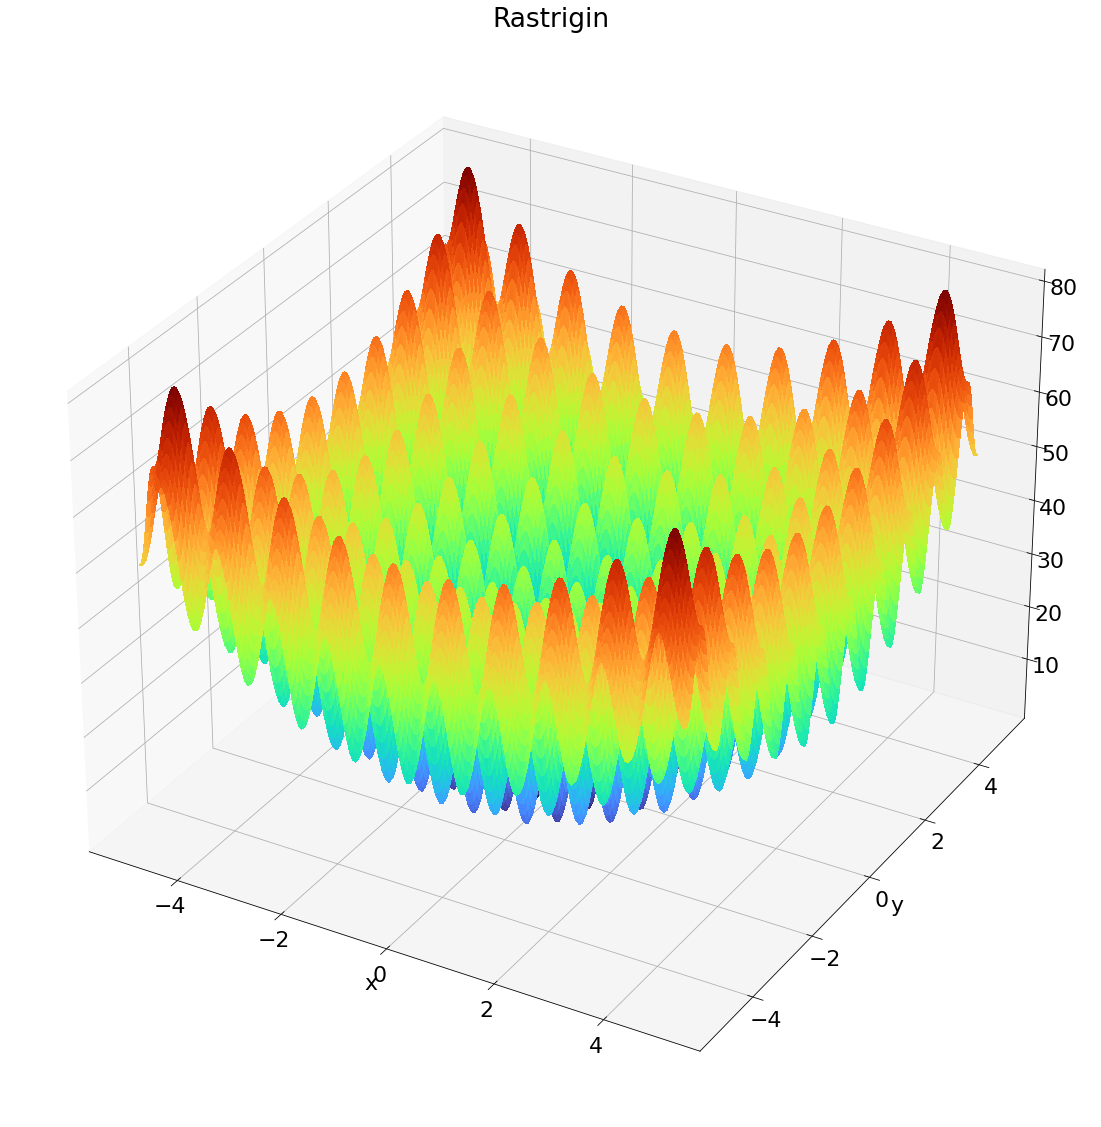

In [7]:
x = np.linspace(-5, 5, 200)
y = np.linspace(-5, 5, 200)

x, y = np.meshgrid(x, y)

z = rastrigin(x, y)

# plotting

# configs
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 22})
fig.set_size_inches(20, 20)

ax = fig.add_subplot(projection='3d')

ax.set_title('Rastrigin')
ax.set_xlabel('x')
ax.set_ylabel('y')

xx = np.array([[0.15971516, 2.73072177, -0.73116482]])
yy = np.array([[-3.04770558, -2.48578925, -3.65409909]])
zz = np.array([[10, 20, 60]])

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.turbo, linewidth=1, antialiased=False)

# ax.scatter3D(xx, yy, zz, marker='X', color='k')
# ax.scatter(xx, yy, zz, rstride=1, cstride=1, cmap=cm.Greys, linewidth=1, antialiased=False)

plt.show()

# Rosenbrock

In [8]:
def rosenbrock(x, y, a=1, b=100):
  return np.square(a - x) + (b * np.square(y - np.square(x)))

def get_rosenbrock(X, a=1, b=100):
  x, y = np.array(X[0]), np.array(X[1])
  
  return np.square(a - x) + (b * np.square(y - np.square(x)))

In [10]:
def rosenbrock_grad(X, a=1, b=100):
    x, y = X
    return np.array([
        2 * (x - a) - 4 * b * x * (y - x**2),
        2 * b * (y - x**2)
    ])

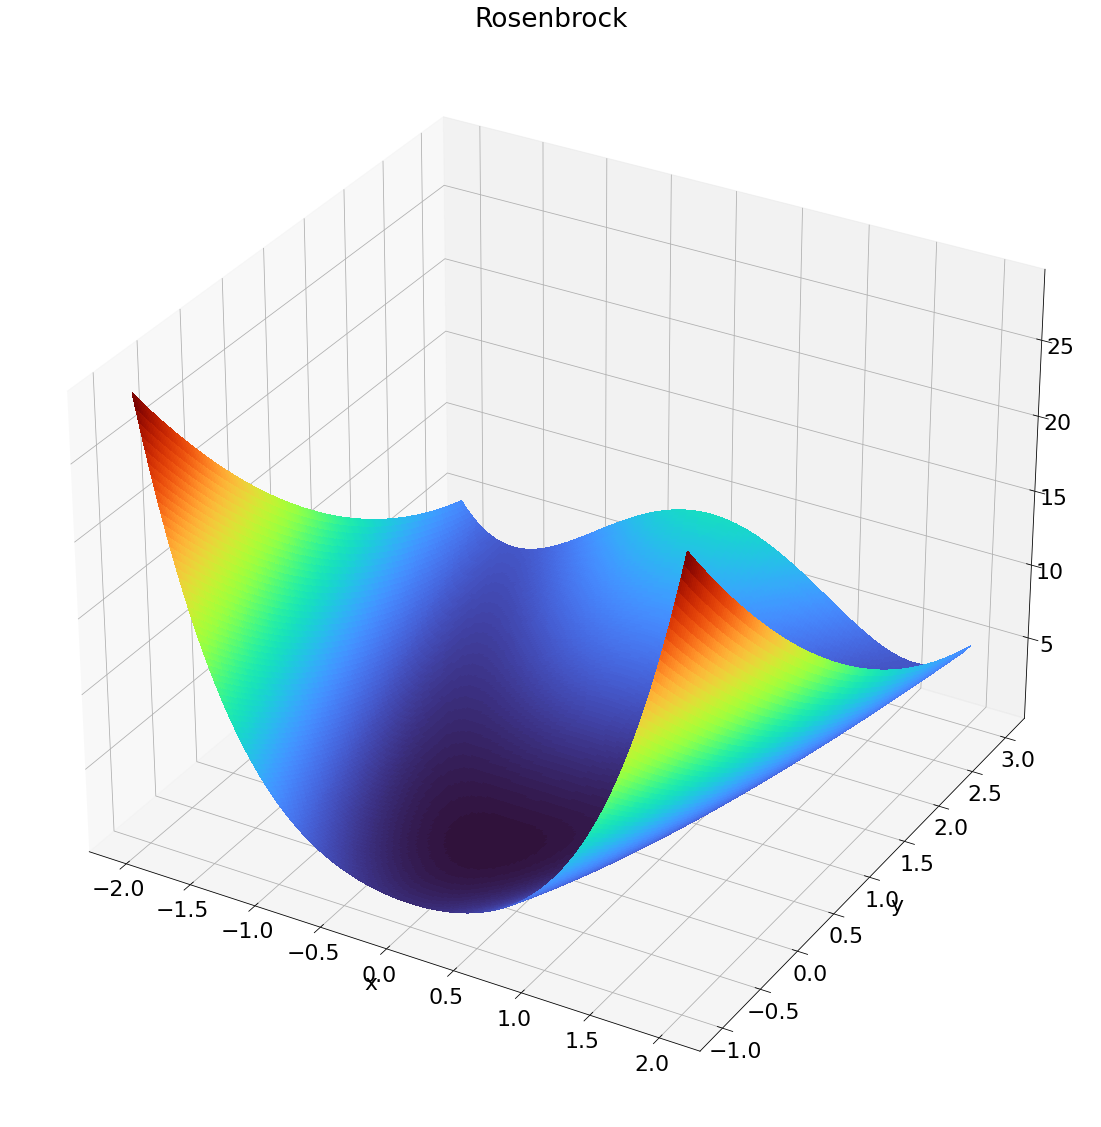

In [507]:
x = np.linspace(-2, 2, 200)
y = np.linspace(-1, 3, 200)

x, y = np.meshgrid(x, y)

# print(x)
# print(y)

z = rosenbrock(x, y)

# plotting

# configs
fig = plt.figure()
matplotlib.rcParams.update({'font.size': 22})
fig.set_size_inches(20, 20)

ax = fig.add_subplot(projection='3d')

ax.set_title('Rosenbrock')
ax.set_xlabel('x')
ax.set_ylabel('y')

ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap=cm.turbo, linewidth=0, antialiased=False)

plt.show()

# Particle Swarm Optimization

### Swarm size 20 - first trial

In [15]:
SWARM_SIZE = 20

# initial position

current_pos = np.random.uniform(-4, 4, (SWARM_SIZE, 2))

# set particles best position to initial position

best_pos = current_pos.copy()
best_pos

current_pos, best_pos

(array([[-0.58615788, -2.18852111],
        [-0.39398407,  0.36371306],
        [-1.36585365,  1.40846402],
        [-3.3644534 , -2.91424793],
        [ 2.98748286, -1.64125944],
        [-2.32179679,  3.05564994],
        [ 1.93356318, -0.08949414],
        [ 0.44868315,  2.240169  ],
        [ 0.38199536, -3.81108849],
        [-3.31352141,  1.35559322],
        [-2.96670569, -1.75579779],
        [-3.57535131, -3.37207718],
        [-1.47331329,  2.4796951 ],
        [ 0.98802511, -1.47981641],
        [-2.79388362,  0.45331152],
        [ 1.78973337,  1.09293051],
        [ 1.12313994,  3.34875623],
        [-2.92845854,  3.30843006],
        [ 2.86934847, -2.19278746],
        [ 0.19664286,  3.78208906]]),
 array([[-0.58615788, -2.18852111],
        [-0.39398407,  0.36371306],
        [-1.36585365,  1.40846402],
        [-3.3644534 , -2.91424793],
        [ 2.98748286, -1.64125944],
        [-2.32179679,  3.05564994],
        [ 1.93356318, -0.08949414],
        [ 0.44868315,  2.2

In [16]:
# debug

all_values = [get_rosenbrock(x) for x in best_pos]
all_values

[643.6700340038951,
 6.28998363090022,
 26.49059005667455,
 20279.139294683064,
 11168.647709352874,
 556.2990452447907,
 1466.3529825843211,
 415.995874160805,
 1566.1739098149521,
 9280.418623793652,
 11161.056175665068,
 26120.028407132973,
 15.668039975971318,
 603.1986694040256,
 5420.281206065803,
 445.9244195804702,
 435.70267774601285,
 2790.0245005696825,
 10873.533796267957,
 1401.9651990618913]

In [17]:
# initialize swarm's best position

swarm_best_pos = best_pos[0]
swarm_best_val = get_rosenbrock(swarm_best_pos)

for i in range(SWARM_SIZE):
  if (current_val := get_rosenbrock(current_pos[i])) < swarm_best_val:
    swarm_best_val = current_val
    swarm_best_pos = current_pos[i]
    print("Updated best position: {} for particle {} with value {}".format(swarm_best_pos, i, swarm_best_val))
    
print("Best value: {}, coordinates: {}".format(swarm_best_val, swarm_best_pos))

Updated best position: [-0.39398407  0.36371306] for particle 1 with value 6.28998363090022
Best value: 6.28998363090022, coordinates: [-0.39398407  0.36371306]


In [18]:
# initialize initial velocity of particles

current_vel = np.random.uniform(-1, 1, (SWARM_SIZE, 2))
current_vel

array([[-0.49017498,  0.68254773],
       [ 0.05296464, -0.3122156 ],
       [ 0.08368262,  0.92293569],
       [-0.94789413, -0.73737883],
       [-0.17993981,  0.98989485],
       [-0.00490687, -0.41554034],
       [ 0.28537803, -0.43398222],
       [ 0.42091247,  0.50975038],
       [ 0.99979956,  0.49048793],
       [-0.62230506, -0.43879235],
       [-0.71194779, -0.09804884],
       [ 0.03626569,  0.53210774],
       [ 0.01564062,  0.53042205],
       [ 0.67920301,  0.08492749],
       [-0.11434853,  0.15481615],
       [-0.5440324 , -0.5029589 ],
       [-0.7369293 ,  0.09969885],
       [ 0.63038312,  0.52646738],
       [ 0.52930774,  0.55670256],
       [ 0.70787428, -0.31239453]])

In [19]:
%%time

# generation iterations
GENS = 2000

# LEARNING CONSTANTS (b and c called beta, gamma for better variable naming)
INERTIA_WEIGHT = 0.9
BETA, GAMMA = np.random.rand(2)

for j in tqdm(range(GENS)):
  if (j > 1000):
    INERTIA_WEIGHT = 0.4
  for i in range(SWARM_SIZE):
    for dim in range(2):
      r1, r2 = np.random.rand(2)
      
      # update particle velocity
      current_vel[i][dim] = INERTIA_WEIGHT * current_vel[i][dim] + (BETA * r1 * (best_pos[i][dim] - current_pos[i][dim])) + (GAMMA * r2 * (swarm_best_pos[dim] - current_pos[i][dim]))
      
    # update particle position
    current_pos[i] = current_pos[i] + current_vel[i]
    
    if get_rosenbrock(current_pos[i]) < get_rosenbrock(best_pos[i]):
      best_pos[i] = current_pos[i]
      if get_rosenbrock(best_pos[i]) < swarm_best_val:
        
        # update swarm's best position and value
        swarm_best_val = get_rosenbrock(best_pos[i])
        swarm_best_pos = best_pos[i]
        print("Found best swarm value {} for particle {}".format(swarm_best_val, swarm_best_pos))

print("Best value: {}, coordinates: {}".format(swarm_best_val, swarm_best_pos))

 17%|█▋        | 348/2000 [00:00<00:00, 1765.03it/s]

Found best swarm value 1.9510671205827161 for particle [-0.34631589  0.08271902]
Found best swarm value 0.8394506160930157 for particle [0.69633183 0.57132085]
Found best swarm value 0.10791000414303545 for particle [1.19135172 1.44601995]
Found best swarm value 0.017336717674119574 for particle [1.13082833 1.2802582 ]
Found best swarm value 0.006342341337561902 for particle [0.98767132 0.96762675]
Found best swarm value 0.0007441543658199106 for particle [0.97336217 0.94684587]
Found best swarm value 0.00019301038078118027 for particle [1.01261005 1.02479603]
Found best swarm value 0.0001629800221474844 for particle [1.00808075 1.01523846]
Found best swarm value 9.512781043966029e-05 for particle [1.00775426 1.01497705]
Found best swarm value 8.321905759914436e-05 for particle [1.0075738  1.01571346]
Found best swarm value 6.585066511157e-05 for particle [1.00788683 1.01602687]
Found best swarm value 3.4692057900662786e-05 for particle [1.00555335 1.01133382]
Found best swarm value 1.

 36%|███▋      | 729/2000 [00:00<00:00, 1842.21it/s]

Found best swarm value 9.036522979653556e-15 for particle [1.00000009 1.00000019]
Found best swarm value 7.305057463807593e-15 for particle [1.00000008 1.00000016]
Found best swarm value 5.357868379777551e-15 for particle [1.00000007 1.00000014]
Found best swarm value 5.205273660933279e-15 for particle [1.00000007 1.00000014]
Found best swarm value 4.921236952969819e-15 for particle [1.00000005 1.00000011]
Found best swarm value 3.860485753836529e-15 for particle [1.00000006 1.00000011]
Found best swarm value 1.950693775466445e-15 for particle [1.00000004 1.00000009]
Found best swarm value 1.4825498335154632e-15 for particle [1.00000004 1.00000007]
Found best swarm value 8.830221791491225e-16 for particle [1.         1.00000001]
Found best swarm value 2.352372253522756e-16 for particle [0.99999999 0.99999997]
Found best swarm value 2.1465034084763132e-16 for particle [0.99999999 0.99999997]
Found best swarm value 1.8335421040247966e-17 for particle [1. 1.]
Found best swarm value 3.9755

 56%|█████▌    | 1113/2000 [00:00<00:00, 1799.99it/s]

Found best swarm value 3.6707246059460176e-25 for particle [1. 1.]
Found best swarm value 3.3477230431129455e-25 for particle [1. 1.]
Found best swarm value 2.1179342513754383e-25 for particle [1. 1.]
Found best swarm value 7.96385159142623e-26 for particle [1. 1.]
Found best swarm value 4.711175933593035e-27 for particle [1. 1.]
Found best swarm value 1.973828592476124e-27 for particle [1. 1.]
Found best swarm value 1.9729411239577505e-27 for particle [1. 1.]
Found best swarm value 1.8134433096833772e-27 for particle [1. 1.]
Found best swarm value 1.0923874644564402e-27 for particle [1. 1.]
Found best swarm value 1.0284897311335382e-27 for particle [1. 1.]
Found best swarm value 9.139569884567626e-28 for particle [1. 1.]
Found best swarm value 8.681907300022998e-28 for particle [1. 1.]
Found best swarm value 8.45868431574874e-28 for particle [1. 1.]
Found best swarm value 8.197867178960043e-28 for particle [1. 1.]
Found best swarm value 7.127974576254046e-28 for particle [1. 1.]
Found

100%|██████████| 2000/2000 [00:01<00:00, 1954.02it/s]

Best value: 2.38149711715237e-28, coordinates: [1. 1.]
CPU times: user 1.04 s, sys: 109 ms, total: 1.15 s
Wall time: 1.03 s


# Gradient Descent

## Gradient descent on Rosenbrock

In [ ]:
def animate(i, X):
  fig = plt.figure()

  plot_xlow = -2
  plot_xlow = plot_ylow = -5

  plot_xhigh = 2
  plot_xhigh = plot_yhigh = 5

  f = rastrigin

  x, y = np.array(np.meshgrid(np.linspace(plot_xlow, plot_xhigh, 1000), np.linspace(plot_ylow, plot_yhigh, 1000)))
  z = f(x, y)
  x_min = x.ravel()[z.argmin()]
  y_min = y.ravel()[z.argmin()]

  fig, ax = plt.subplots(figsize=(8, 6))
  img = ax.imshow(z, extent=[plot_xlow, plot_xhigh, plot_ylow, plot_yhigh], origin='lower', cmap='Spectral', alpha=0.75)
  fig.colorbar(img, ax=ax)
  
  contours = ax.contour(x, y, z, 10, colors='black', alpha=0.4)
  ax.clabel(contours, inline=True, fontsize=8, fmt="%.0f")

  # Add particles
#   ax.plot([x_min], [y_min], marker='x', markersize=5, color="black")  # global minimum shown as 'x'

#   p_current = ax.scatter(x[0], x[1], marker='o', color="blue")
  
  plt.title("Iteration %d" % i)
  
  plt.scatter(X[0], X[1], marker='D', color='blue')
  plt.scatter([0], [0], marker='x', color='black')
  
  ax.set_xlim([-4, 4])
  ax.set_ylim([-4, 4])

  plt.savefig('rastrigin_iteration {}.png'.format(i))

In [110]:
def rosenbrock_grad(X, a=0, b=150):
  x, y = X
  
  return np.array([
      2 * (x - a) - 4 * b * x * (y - np.square(x)),
      2 * b * (y - np.square(x))
  ])

def get_rosenbrock(X, a=0, b=150):
  x, y = np.array(X[0]), np.array(X[1])
  
  return np.square(a - x) + (b * np.square(y - np.square(x)))

In [135]:
def gradient_descent(J_grad, x_init, alpha=0.01, epsilon=1e-10, max_iterations=1000):
    x = x_init
    function_val = []
    for i in range(max_iterations):
      
        # get frame
        if (i % 250) == 0:
            animate(i, x)
        
        x = x - alpha * J_grad(x)
      
        # stop if no improvement
        if np.linalg.norm(J_grad(x)) < epsilon:
            return x, i + 1
    
    return x, max_iterations

<ipython-input-119-328970a63df4>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


x position= [0.00141551 0.00141551]
Rosenbrock value = 0.0003017044872328127
Grad Rosenbrock(x*) = [0.00163052 0.42405246]
Iterations = 5000


<Figure size 432x288 with 0 Axes>

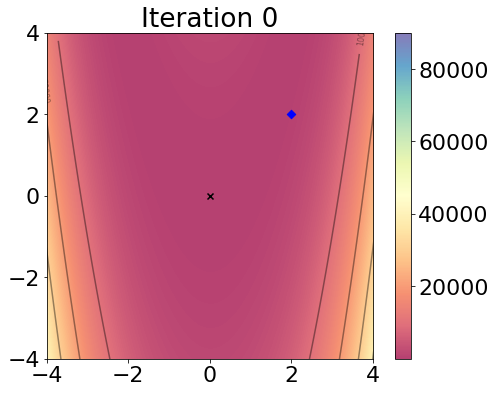

<Figure size 432x288 with 0 Axes>

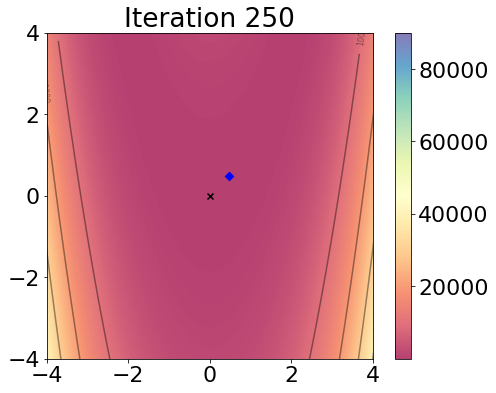

<Figure size 432x288 with 0 Axes>

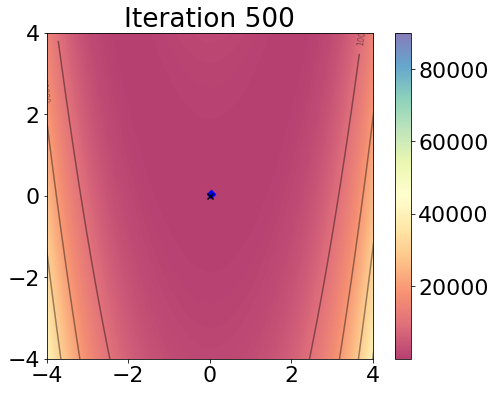

<Figure size 432x288 with 0 Axes>

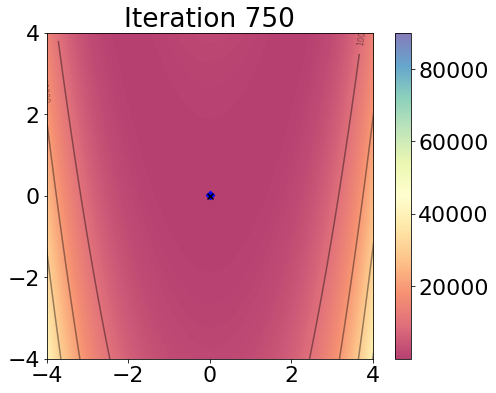

<Figure size 432x288 with 0 Axes>

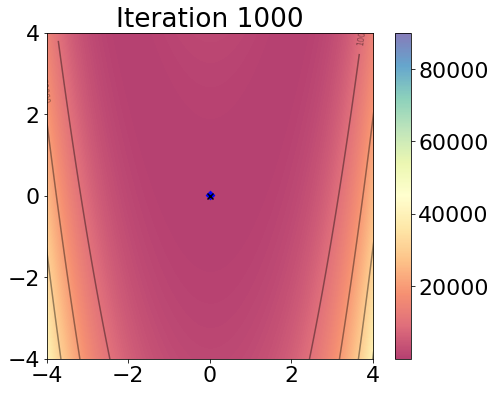

<Figure size 432x288 with 0 Axes>

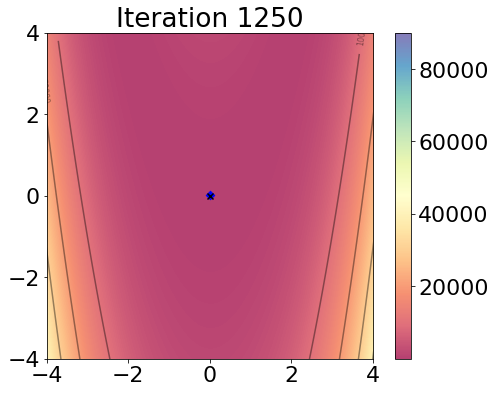

<Figure size 432x288 with 0 Axes>

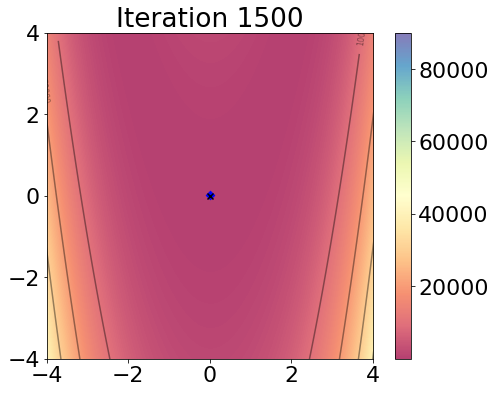

<Figure size 432x288 with 0 Axes>

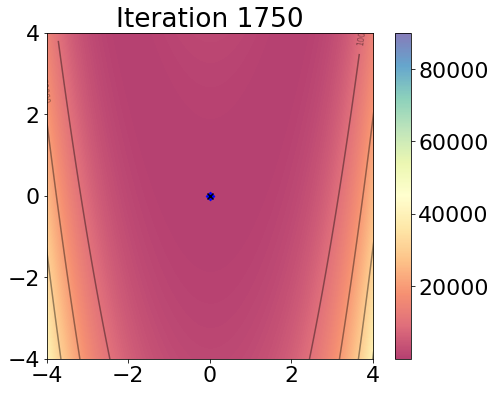

<Figure size 432x288 with 0 Axes>

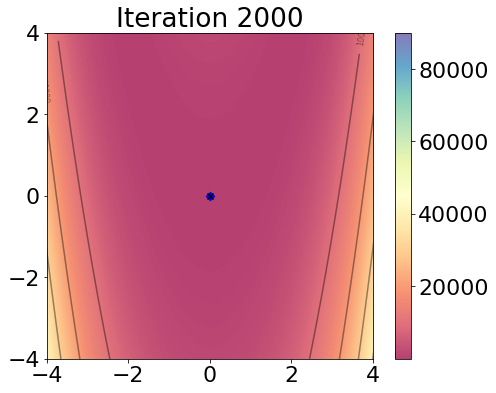

<Figure size 432x288 with 0 Axes>

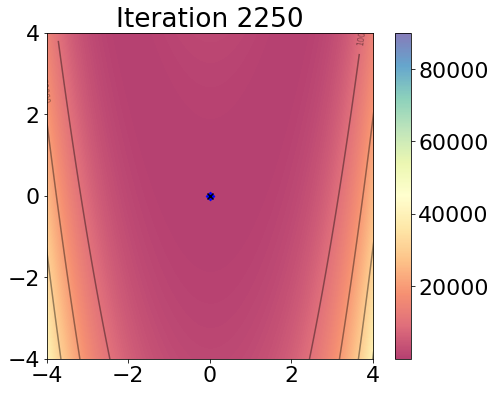

<Figure size 432x288 with 0 Axes>

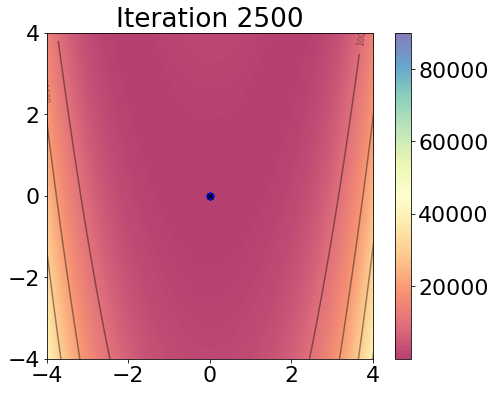

<Figure size 432x288 with 0 Axes>

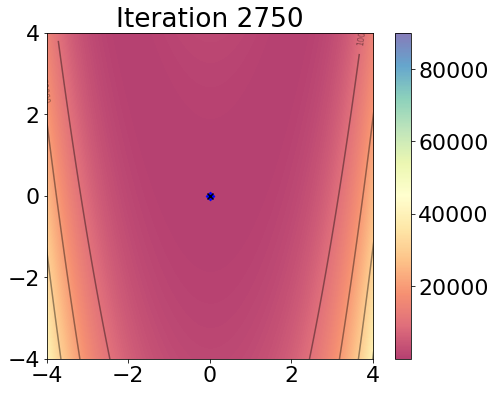

<Figure size 432x288 with 0 Axes>

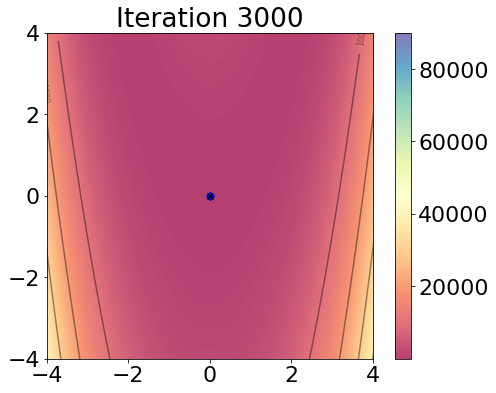

<Figure size 432x288 with 0 Axes>

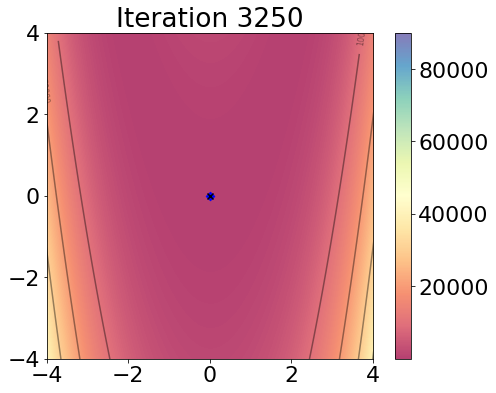

<Figure size 432x288 with 0 Axes>

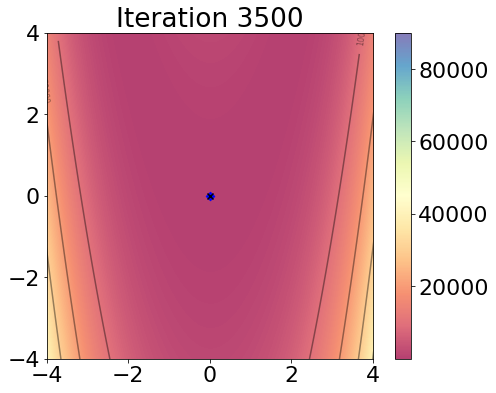

<Figure size 432x288 with 0 Axes>

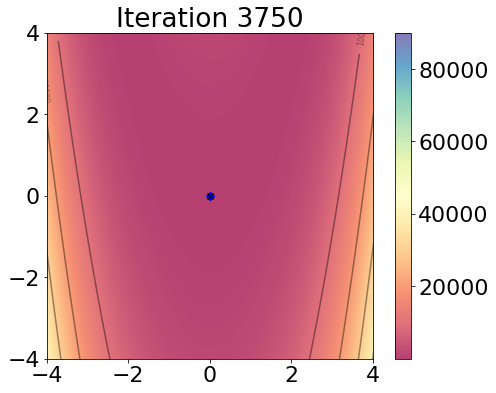

<Figure size 432x288 with 0 Axes>

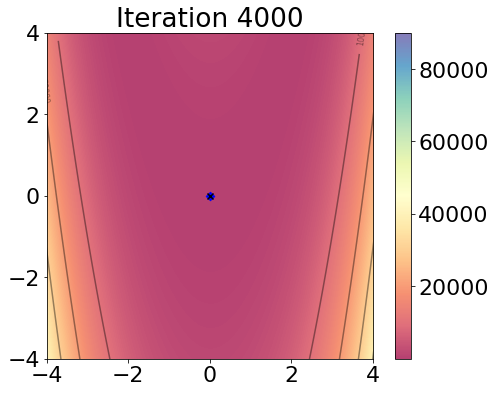

<Figure size 432x288 with 0 Axes>

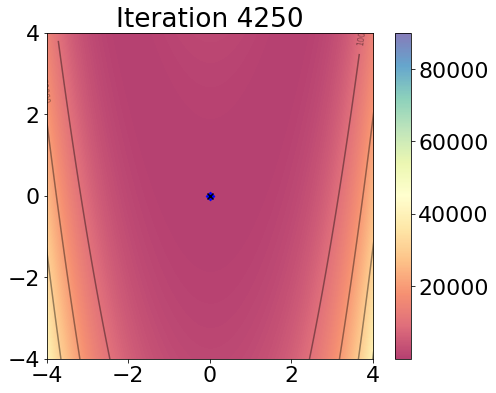

<Figure size 432x288 with 0 Axes>

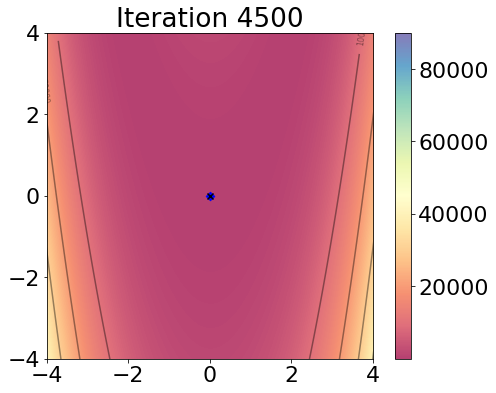

<Figure size 432x288 with 0 Axes>

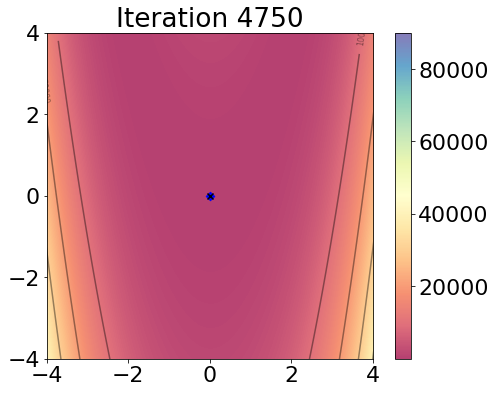

In [121]:
# initial point
x_init = [2, 2]

x_min, it = gradient_descent(rosenbrock, x_init, alpha=0.001, max_iterations=5000)

print('x position=', x_min)
print('Rosenbrock value =', get_rosenbrock(x_min))
print('Grad Rosenbrock(x*) =', rosenbrock_grad(x_min))
print('Iterations =', it)

## Gradient Descent in Rastrigin

Gradient based optimization is not well suited for optimizing functions with so many local minima. Every particle tends to converge on its own nearest local minima. E.g. if we set the initial coordinates of the particle [0.5, 0.5], it will find its closest local minima (also the global minima) of the function with value 0.

In [131]:
def rastrigin_grad(X):
  x, y = X
  
  return np.array([2 * x + 20 * np.pi * np.sin(2 * np.pi * x),
                   2 * y + 20 * np.pi * np.sin(2 * np.pi * y)])

x position= [1.98991223e+00 2.33051639e-13]
Rastrigin value = 3.979831190554087
Grad Rastrigin(x*) = 3.979831190554087
Iterations = 70


<Figure size 432x288 with 0 Axes>

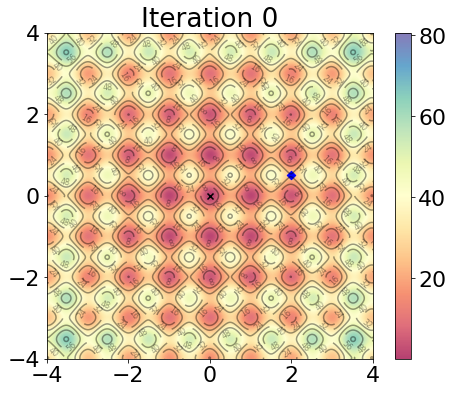

<Figure size 432x288 with 0 Axes>

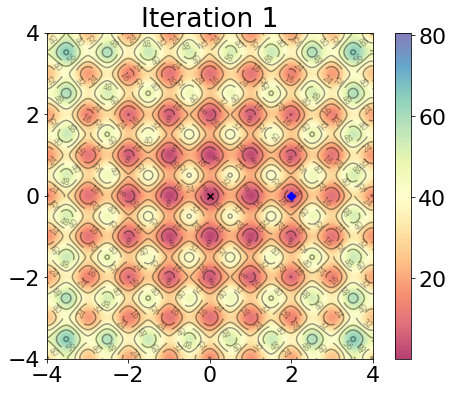

In [134]:
# initial point
x_init = [2.0, 0.5]

x_min, it = gradient_descent(rastrigin_grad, x_init, alpha=0.001, max_iterations=5000)

animate(1, x_min)

print('x position=', x_min)
print('Rastrigin value =', get_rastrigin(x_min))
print('Grad Rastrigin(x*) =', get_rastrigin(x_min))
print('Iterations =', it)